# Handwritten Digit Recognition 
ระบบรู้จำเลขลายมือเขียน

In [2]:
from sklearn import datasets 
import matplotlib.pyplot as plt
import numpy as np

## Dataset

In [3]:
digits = datasets.load_digits()         # The digits dataset
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
digits.images.shape

(1797, 8, 8)

In [6]:
digits.data.shape

(1797, 64)

In [7]:
# digits.images[:1]
digits.images[:2]

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]])

In [8]:
digits.data[:1]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
digits.target[:40]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9])

In [10]:
digits.target.shape

(1797,)

In [11]:
img = digits.images[2]
# img = digits.images[1]
img = digits.images[0]
img.shape

(8, 8)

In [12]:
print(img)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [13]:
np.isnan(digits.images).sum()    # Missing values (มี Nan หรือไม่)
# np.isnan(digits.data).sum()       

0

## Visualization

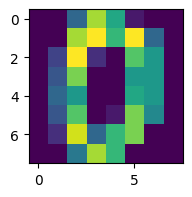

In [14]:
img = digits.images[0]

plt.figure(figsize=(2, 2))
plt.imshow(img) 
plt.show()

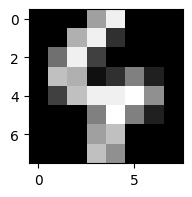

In [15]:
# img = digits.images[1796]
img = digits.images[110]
plt.figure(figsize=(2, 2))
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

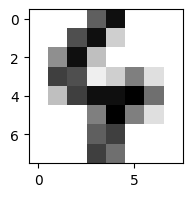

In [16]:
plt.figure(figsize=(2, 2))
plt.imshow(img, cmap=plt.cm.gray_r)
# plt.axis('off')
plt.show()

In [17]:
def visual_multi(i):
    '''Plots 40 digits, เริ่ม ที่ digit i'''
    nplots = 40
    fig = plt.figure(figsize=(8, 4)) # 6x6
    for j in range(nplots):
#         plt.subplot(3,5,j+1)
        plt.subplot(4, 10, j+1)
        plt.imshow(digits.images[i+j], cmap=plt.cm.gray_r)
        plt.title(digits.target[i+j])
        # plt.axis('off')
        plt.xticks([])
        plt.yticks([])
        # plt.tick_params(bottom=False)

    plt.show()

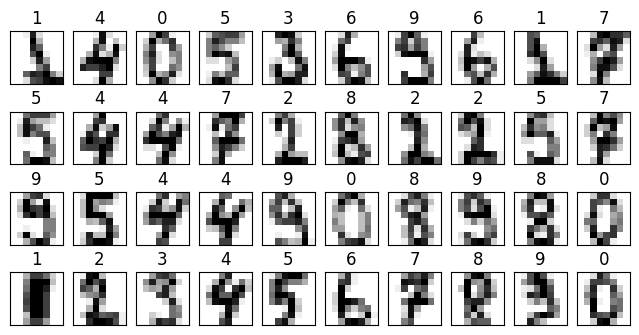

In [18]:
visual_multi(1000)

## เตรียมข้อมูล (Prepare data)

In [19]:
digits.images.shape

(1797, 8, 8)

In [20]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [21]:
digits.images[0].shape

(8, 8)

In [22]:
n_samples = len(digits.images)  # จำนวน Samples 1797
n_samples

1797

In [23]:
digits.images.shape

(1797, 8, 8)

In [24]:
X = digits.images.reshape(n_samples, -1)      # reshape แต่ละรูป จาก 8x8 ให้เป็น 1x64 (Vector 1 row)
X.shape

(1797, 64)

In [25]:
X[:1]       # ข้อมูล sample ลำดับแรก (index 0)
# X[:2]       # ข้อมูล sample 2 ลำดับแรก (index 0, 1)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [26]:
X[:1].shape

(1, 64)

In [27]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [28]:
digits.data.shape

(1797, 64)

In [29]:
X.shape

(1797, 64)

In [30]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [31]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [32]:
y = digits.target
y[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
X.shape

(1797, 64)

In [34]:
y.shape

(1797,)

## Scatter Plot

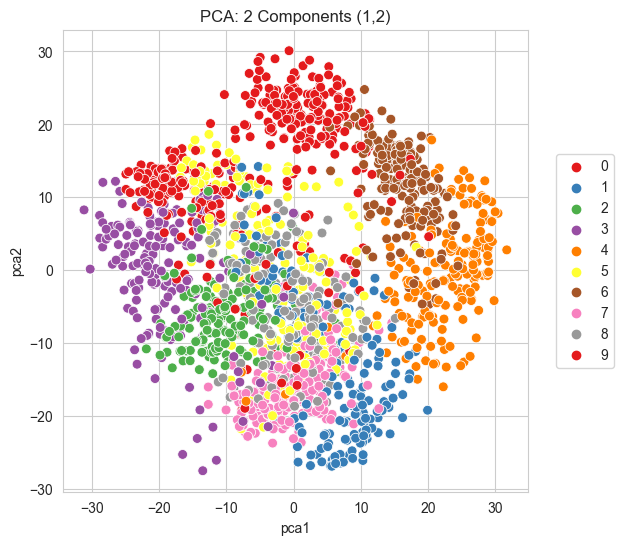

In [35]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df = pd.DataFrame(X_pca, columns=['pca1','pca2'])
df['labels'] = y

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = 6, 6  
g=sns.scatterplot(data=df, x='pca1', y='pca2', hue='labels', 
                  s=50, palette='Set1', legend='full')
g.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), ncol=1)
plt.title('PCA: 2 Components (1,2)')
plt.show()

## Train-test Split

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.4, random_state=20) # 
X_train.shape , X_test.shape

((1078, 64), (719, 64))

## Train

In [37]:
from sklearn.svm import SVC

model = SVC()

In [38]:
model.fit(X_train, y_train)

SVC()

## Evaluation

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

print('Score: {:.4f}' . format(model.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Score: 0.9819
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        63
           3       1.00      0.95      0.97        80
           4       1.00      0.99      0.99        75
           5       0.96      0.99      0.97        71
           6       1.00      0.99      0.99        71
           7       0.95      0.99      0.97        80
           8       0.94      1.00      0.97        64
           9       0.97      0.94      0.95        77

    accuracy                           0.98       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.98      0.98       719

[[63  0  0  0  0  0  0  0  0  0]
 [ 0 75  0  0  0  0  0  0  0  0]
 [ 0  0 63  0  0  0  0  0  0  0]
 [ 0  0  0 76  0  1  0  1  2  0]
 [ 0  0  0  0 74  0  0  0  1  0]
 [ 0  0  0  0  0 70  0  0  0  1]
 [ 0  0  0  0  0  1 70  0  0 

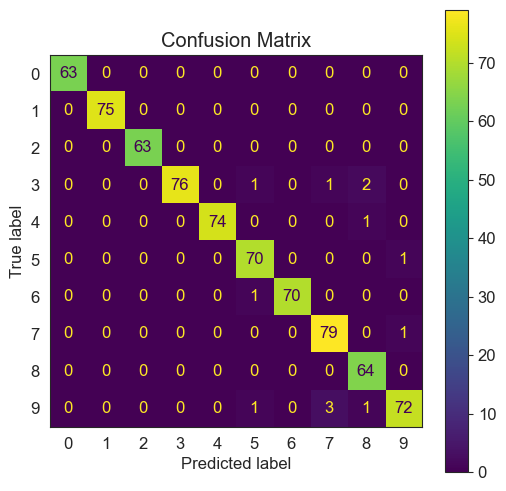

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

sns.set_style('white')
plt.rcParams.update({'font.size':12})

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')

plt.show()

In [41]:
# import scikitplot as skplot
# skplot.metrics.plot_confusion_matrix(y_test, y_pred)
# plt.show()

In [42]:
y_test[:20]

array([0, 7, 9, 5, 8, 1, 3, 3, 7, 0, 9, 4, 7, 4, 0, 1, 1, 8, 1, 3])

In [43]:
y_pred = model.predict(X_test)
y_pred[:20]

array([0, 7, 9, 5, 8, 1, 3, 3, 7, 0, 9, 4, 7, 4, 0, 1, 1, 8, 1, 3])

## ที่ทำนายผิด (Missed Classification)

In [44]:
idx_miss = np.where(y_test != y_pred)
idx_miss

(array([ 98, 111, 268, 338, 351, 427, 434, 449, 470, 523, 562, 638, 657]),)

In [45]:
y_test[idx_miss]

array([9, 5, 3, 4, 9, 3, 6, 7, 3, 3, 9, 9, 9])

In [46]:
y_pred[idx_miss]

array([8, 9, 8, 8, 5, 5, 5, 9, 7, 8, 7, 7, 7])

In [47]:
X_test[idx_miss][0]

array([ 0.,  0.,  2., 10., 16., 11.,  1.,  0.,  0.,  0., 13., 13., 10.,
       16.,  8.,  0.,  0.,  4., 14.,  1.,  8., 14.,  1.,  0.,  0.,  4.,
       15., 12., 15.,  8.,  0.,  0.,  0.,  0.,  6.,  7., 14.,  5.,  0.,
        0.,  0.,  1.,  2.,  0., 12.,  5.,  0.,  0.,  0.,  8., 15.,  6.,
       13.,  4.,  0.,  0.,  0.,  0.,  5., 11., 16.,  3.,  0.,  0.])

In [48]:
X_test[idx_miss][0].reshape(8,8)

array([[ 0.,  0.,  2., 10., 16., 11.,  1.,  0.],
       [ 0.,  0., 13., 13., 10., 16.,  8.,  0.],
       [ 0.,  4., 14.,  1.,  8., 14.,  1.,  0.],
       [ 0.,  4., 15., 12., 15.,  8.,  0.,  0.],
       [ 0.,  0.,  6.,  7., 14.,  5.,  0.,  0.],
       [ 0.,  1.,  2.,  0., 12.,  5.,  0.,  0.],
       [ 0.,  8., 15.,  6., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  5., 11., 16.,  3.,  0.,  0.]])

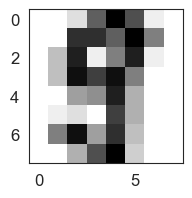

In [49]:
fig = plt.figure(figsize=(2, 2)) 
# plt.imshow(X_test[idx_miss][0], cmap=plt.cm.gray_r)
plt.imshow(X_test[idx_miss][0].reshape(8,8), cmap=plt.cm.gray_r)
# plt.imshow(X_test[idx_miss][0].reshape(8,8), cmap=plt.cm.gray)
plt.show()

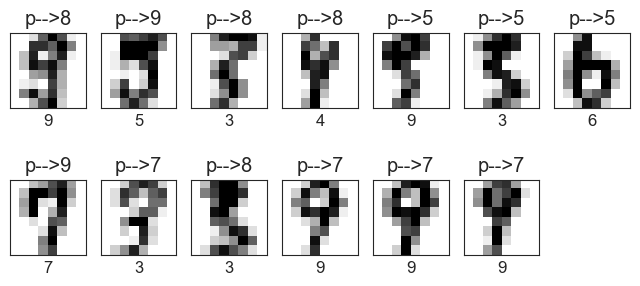

In [50]:
fig = plt.figure(figsize=(8, 3.5)) 
nplots = 20
for j,k in enumerate(idx_miss[0]):
#     print(j)
    plt.subplot(2, 7, j+1)
    plt.imshow(X_test[k].reshape(8,8), cmap=plt.cm.gray_r)
    title = f'p-->{y_pred[k]}'   # เลขจริง และ ที่ predicted
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_test[k])
#     plt.axis('off')
    if j>= nplots-1:
        break

plt.show()

In [51]:
# Re-train the model
model = SVC()
model.fit(X, y)

SVC()

## Save the Model

In [52]:
import joblib

joblib.dump(model, 'digit_recognition_model.pkl')

['digit_recognition_model.pkl']

## ใช้ Model Predict Image file

In [53]:
!pip show pillow

In [54]:
!pip install Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 6.0 MB/s eta 0:00:006.0 MB/s eta 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip


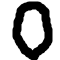

In [55]:
from PIL import Image, ImageOps

# model = SVC()
# model.fit(X, y)

imgfile = 'data/digits/digit0.png'      # digit image file (number zero)

img = Image.open(imgfile).convert('L')  # convert to grayscale
img

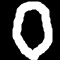

In [56]:
img = ImageOps.invert(img)              # invert
img

In [57]:
img = img.resize((8, 8), Image.ANTIALIAS)  # resize to 8x8 and antialias
img

/var/folders/r3/wbw1d1y54ynghq06l4pgqg280000gn/T/ipykernel_49173/3161337406.py:1: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((8, 8), Image.ANTIALIAS)  # resize to 8x8 and antialias


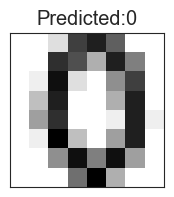

In [58]:
pixel = np.array(img)  # 8x8
pixel = pixel / 255.0 * 16
pixel = pixel.astype('int')

my_digit = pixel.reshape(1, -1)  # 1x64
predicted = model.predict(my_digit)
#     print('Digit:{}'. format(predicted[0]))

plt.figure(figsize=(2, 2))
plt.imshow(pixel, cmap=plt.cm.gray_r)
plt.title('Predicted:{}'. format(predicted[0]))
plt.xticks([])
plt.yticks([])
plt.show()

In [59]:
pixel

array([[ 0,  0,  2, 12, 14, 10,  0,  0],
       [ 0,  0, 13, 11,  5, 14,  8,  0],
       [ 0,  1, 15,  2,  0,  7, 12,  0],
       [ 0,  4, 14,  0,  0,  5, 14,  0],
       [ 0,  6, 13,  0,  0,  1, 14,  1],
       [ 0,  1, 16,  4,  0,  6, 14,  0],
       [ 0,  0,  7, 15,  8, 15,  6,  0],
       [ 0,  0,  0,  9, 16,  5,  0,  0]])

In [60]:
my_digit

array([[ 0,  0,  2, 12, 14, 10,  0,  0,  0,  0, 13, 11,  5, 14,  8,  0,
         0,  1, 15,  2,  0,  7, 12,  0,  0,  4, 14,  0,  0,  5, 14,  0,
         0,  6, 13,  0,  0,  1, 14,  1,  0,  1, 16,  4,  0,  6, 14,  0,
         0,  0,  7, 15,  8, 15,  6,  0,  0,  0,  0,  9, 16,  5,  0,  0]])

In [61]:
my_digit.shape

(1, 64)

## Decision Regions

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


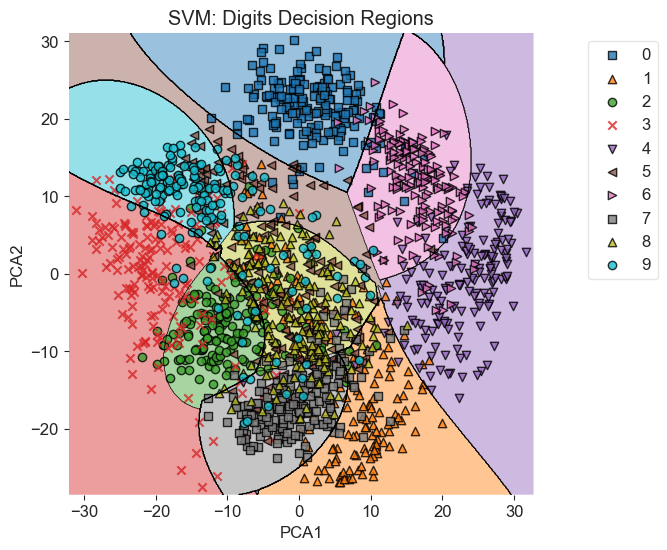

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

model.fit(X_pca, y)

from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(np.array(X_pca), y, 
                      clf=model, 
                      legend=2) 

handles, labels = ax.get_legend_handles_labels()
class_names = np.unique(y)
ax.legend(handles, class_names, framealpha=0.5, loc='upper left',bbox_to_anchor=(1.1, 1.0))

plt.title('SVM: Digits Decision Regions')

plt.xticks()
plt.yticks()
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.show()

## Cross-validation

In [63]:
from sklearn.model_selection import cross_val_score

model = SVC()

cvs = cross_val_score(model, X, y, cv=5)  
print(cvs.round(4))
print('Average Score: {:.3f}' .format(cvs.mean()))

[0.9611 0.9444 0.9833 0.9889 0.9387]
Average Score: 0.963


In [64]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

cvs = cross_val_score(model, X, y, cv=5)  
print(cvs.round(4))
print('Average Score: {:.3f}' .format(cvs.mean()))

[0.7667 0.7222 0.7994 0.844  0.7827]
Average Score: 0.783


In [65]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

cvs = cross_val_score(model, X, y, cv=5) 
print('cross val scores {}'.format(cvs.round(3)))
print('Average Score: {:.3f}' .format(cvs.mean()))

cross val scores [0.947 0.956 0.967 0.981 0.964]
Average Score: 0.963


In [66]:
from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(max_iter=200)
model = LogisticRegression(solver='liblinear',multi_class='auto')

cvs = cross_val_score(model, X, y, cv=5) 
print(cvs.round(4))
print('Average Score: {:.3f}' .format(cvs.mean()))

[0.9222 0.8833 0.9526 0.9582 0.8942]
Average Score: 0.922
